In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_context('talk')
np.set_printoptions(suppress=True) 
    ### not xEyy format(science float format)
%matplotlib inline  

In [2]:
import scipy.io
data = scipy.io.loadmat('ex6data1.mat')
print data.keys()

['y', 'X', '__version__', '__header__', '__globals__']


In [3]:
X = data['X']
y = data['y']
# disp = np.append(X, y, axis=1)
# print disp

In [4]:
def plotData(X, y):
    plt.plot(
        X[np.where(y==0)[0],0], X[np.where(y==0)[0], 1], 'b*');
    plt.plot(
        X[np.where(y==1)[0],0], X[np.where(y==1)[0], 1], 'g.');

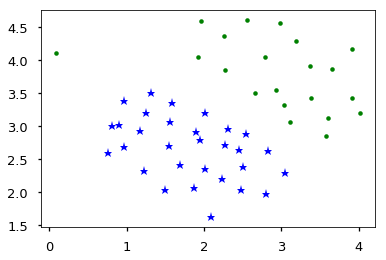

In [5]:
plotData(X, y)

In [6]:
from sklearn.svm import SVC
def svmTrain(X, Y, C, kernelFunction, tol, max_passes):
    clf = SVC(C=C, kernel=kernelFunction, tol=tol, max_iter=max_passes)
    Y = Y.flatten()
    clf.fit(X, Y)
    return clf

In [7]:
def visualizeBoundaryLinear(X, y, model):
    plotData(X, y)
    xp = np.linspace(X.min(axis=0)[0], X.max(axis=0)[0], 100)
    w = model.coef_[0,:]
    b = model.intercept_[0]
    yp = -(w[0]*xp + b)/w[1]
    plt.plot(xp, yp);

w = [[1.40718563 2.13398052]]
b = [-10.34889778]


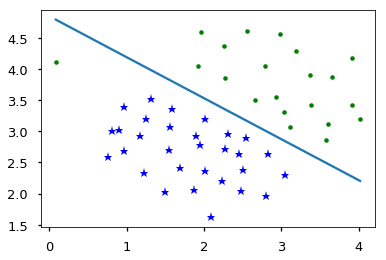

In [8]:
C = 1.0
model = svmTrain(X, y, C, 'linear', 1e-3, 100)
print 'w =', model.coef_
print 'b =', model.intercept_
visualizeBoundaryLinear(X, y, model)

w = [[1.46307645 6.40758306]]
b = [-24.15150394]


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


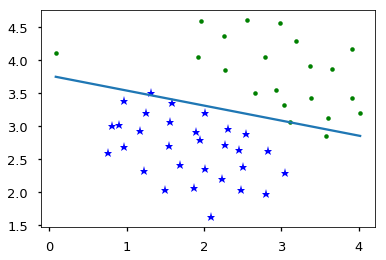

In [9]:
C = 100.0
model = svmTrain(X, y, C, 'linear', 1e-3, 100)
print 'w =', model.coef_
print 'b =', model.intercept_
visualizeBoundaryLinear(X, y, model)

In [10]:
# ###########################################
#
# User defined Kernel !!!!!!!!!!!!!!
#
#
def myLinearKernel(X1, X2):
#     X1 = X1.reshape(-1, 1);
#     X2 = X2.reshape(-1, 1);
    return np.dot(X1.T, X2)

C = 1.0
model = svmTrain(X, y, C, myLinearKernel, 1e-3, 100)
# print 'w =', model.coef_
# print 'b =', model.intercept_
print model.get_params(True)

{'kernel': <function myLinearKernel at 0x10ae0d5f0>, 'C': 1.0, 'verbose': False, 'probability': False, 'degree': 3, 'shrinking': True, 'max_iter': 100, 'decision_function_shape': 'ovr', 'random_state': None, 'tol': 0.001, 'cache_size': 200, 'coef0': 0.0, 'gamma': 'auto', 'class_weight': None}


In [11]:
# ###########################################
# 
# Gaussian Kernel
#
#
def gaussianKernel(x1, x2, sigma):
    return np.exp(-1*np.sum((x1-x2)**2)/(2*sigma**2))

x1 = np.array([1,2,1])
x2 = np.array([0,4,-1])
sigma = 2.0

print gaussianKernel(x1, x2, sigma) ### 0.324652

0.32465246735834974


In [17]:
def visualizeBoundary(X, y, model):
    plotData(X, y)
    u = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    v = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    z = np.zeros([len(u), len(v)])
    for i in range(len(u)):
        for j in range(len(v)):
            this_x = np.array([[u[i], v[j]]])
            z[i,j] = model.predict(this_x)[0]
    z = z.T  ### important to transpose z before calling contour
    ### plot z = 0
    plt.contour(u, v, z, [-0.5, 0.5], colors='r');

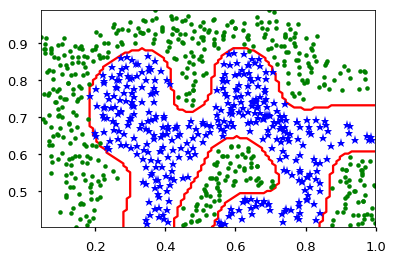

In [18]:
# ###################################
# 
# data2
#
# ###################################
data = scipy.io.loadmat('ex6data2.mat')
X = data['X']
y = data['y']

C = 1.0
sigma = 0.1
model = SVC(C=C, kernel='rbf', gamma=1.0/(sigma**2))
y = y.flatten()
model.fit(X, y)
visualizeBoundary(X, y, model)

In [26]:
# ###################################
# 
# data3
#
# ###################################
data = scipy.io.loadmat('ex6data3.mat')
X = data['X']
y = data['y']
Xval = data['Xval']
yval = data['yval']

In [83]:
def dataset3Params(X, y, Xval, yval):
#     List = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
#     error = np.zeros([len(List), len(List)])
#     y = y.flatten()
#     for i in xrange(len(List)):
#         for j in xrange(len(List)):
#             C = List[i]
#             sigma = List[j]
#             model = SVC(C=C, kernel='rbf', gamma=1.0/(sigma**2))
#             model.fit(X, y)
#             pred = model.predict(Xval)
#             error[i, j] = (pred!=yval).astype('int').mean()
#     i, j = divmod(error.argmin(), error.shape[1])
#     C = List[i]
#     sigma = List[j]
    sigma = 0.1
    C = 0.3
    return C, sigma

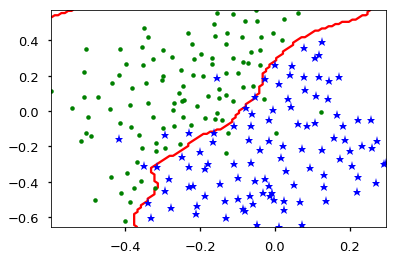

In [88]:
C, sigma = dataset3Params(X, y, Xval, yval)
# print "C, sigma = ", [C, sigma]
model = SVC(C=C, kernel='rbf', gamma=1.0/(sigma**2))
y = y.flatten()
model.fit(X, y)
visualizeBoundary(X, y, model)